# Deep learning for Digit Recognition using Convolution neural network

## AI จดจำตัวเลข ด้วย Convolution neural network

### Wisarut Duangmorakot - wisarut.bank@gmail.com

Digit Recognizer dataset - https://www.kaggle.com/c/digit-recognizer

#### Import libraries

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.backend.tensorflow_backend import set_session
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1' # ไม่ได้ใช้ gpu ในการ compute

#### Import data

In [18]:
df = pd.read_csv('./all/train.csv')

In [19]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### ตรวจสอบว่ามีข้อมูลที่ Missing หรือไม่

In [20]:
df.isnull().any().sum()

0

ไม่มีข้อมูลใดๆที่ Missing

#### แยก Features กับ label

In [21]:
y = df['label']
X = df.drop(columns=['label'])

#### นับจำนวน class และ จำนวน label ในแต่ละคลาส

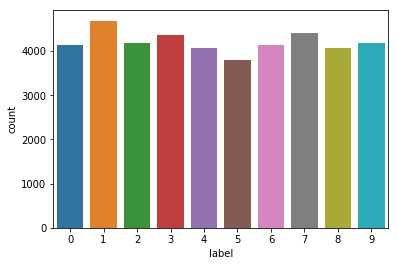

0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

In [22]:
sns.countplot(y)
plt.show()
y.value_counts().sort_index()

Data ที่ label ประกอบไปด้วย 0 - 9 โดยแต่ละคลาสมีขนาดใกล้เคียงกัน

In [23]:
X.shape

(42000, 784)

Dataset มีจำนวนรูปทั้งหมด 42000 แต่ละรูปมีทั้งหมด 784 pixel หรือก็คือ 28x28 pixel

#### ทดสอบแสดงผลรูปภาพจากข้อมูลที่มีอยู่

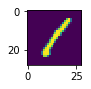

('label is :', 1)


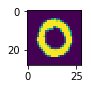

('label is :', 0)


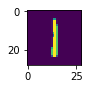

('label is :', 1)


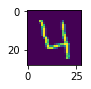

('label is :', 4)


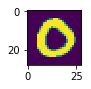

('label is :', 0)


In [24]:
for i in range(5):
    pic = X.loc[i].values.reshape(1,28, 28)
    plt.figure(figsize=(1,1))
    plt.imshow(pic[0])
    plt.show()
    print ('label is :',y[i])

จะเห็นได้ว่ารูปบางรูปมีการเอียงและขนาดไม่เท่ากัน ซึ่งภายหลังเราจะใช้ ImageDataGenerator เข้ามาช่วยในการหมุน, shift รูปภาพ และปรับ Scale ของรูปภาพ เพื่อให้โมเดลมีความ generalize มากขึ้น

#### Data preprocessing

In [25]:
X /= 255.0
X = X.values.reshape(-1, 28, 28,1)
X.shape

(42000, 28, 28, 1)

- นำรูปภาพมาปรับสเกลจากที่มีค่า 0-255 เป็น 0.0-1.0 ซึ่งจะทำให้โมเดลสามารถเทรนได้เร็วยิ่งขึ้น
- ปรับรูปภาพจาก pixel ที่อยู่ในรูปแบบ 1D ให้อยู่ในรูปแบบ 2D เพื่อนำมาใช้กับ Convolution neural network 

In [26]:
y = pd.get_dummies(y)

In [27]:
y.head()

,0,1,2,3,4,5,6,7,8,9
0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


Label encoder class ของเราให้มีขนาดเท่ากับ class เพื่อรองรับ output ของ neural network

#### Cross validation

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
print (len(X_train), len(X_test))

(33600, 8400)


แยก data เป็น 2 ส่วน เพื่อเทรนโมเดล และเพื่อทดสอบโมเดล
- training set มีขนาด 33600 sample
- test set มีขนาด 8400 sample

#### Modeling with Convolution neural network

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()

model.add(Conv2D(input_shape = (28,28,1), filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (2,2),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        16448     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
__________

ใช้ Convolution neural netowork(CNN) ในการทำ Features map โดยหน้าที่ที่สำคัญคือ CNN จะดู pixel รอบข้าง map เป็น features ใหม่ เสมือนเป็นการทำ PCA ซึ่ง CNN เป็นที่นิยมในการ train model กับรูปภาพอยู่แล้ว

Hpyer parameters ของ CNN
- Filters คือจำนวน node ของ layers นั้นๆ
- Kernel_size ความกว้าง-สูง ของ filters มักจะตั้งค่าไว้สูงๆในเลเยอร์ชั้นแรกๆ แล้วลดลงมา
- Activation function เราจะใช้ non-linear function relu เนื่องจากสามารถลู่เข้าได้เร็ว

Maxpooling ใช้คู่กับ CNN เพื่อใช้ในการ Downsamplings Filters ของ CNN เพื่อลด Computation cost

Dropout ใช้เพื่อทำ Regularization ให้โมเดลไม่เกิดการ Overfitted โดยการ disable neural node แบบสุ่มในขั้นตอนที่เทรน

Flatten ใช้เพื่อทำให้ features maps เหลือเป็น 1D vector

ใช้ softmax activation ในชั้นสุดท้ายเพื่อให้โมเดล เลือก node ที่มี probability สูงสุดเป็น output

ใช้ cross entropy เป็น loss function

ใช้ accuracy ในการวัดประสิทธิภาพโมเดล

#### Train and test model

In [32]:
epochs = 25
batch_size = 32

datagen = ImageDataGenerator(rotation_range=10, zoom_range = 0.1, width_shift_range=0.1,height_shift_range=0.1)
datagen.fit(X_train)

history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size, workers=4)

Epoch 1/25
1050/1050 [==============================] - 143s 136ms/step - loss: 0.4030 - acc: 0.8710 - val_loss: 0.0566 - val_acc: 0.9821
Epoch 2/25
1050/1050 [==============================] - 145s 138ms/step - loss: 0.1401 - acc: 0.9576 - val_loss: 0.0444 - val_acc: 0.9848
Epoch 3/25
1050/1050 [==============================] - 143s 136ms/step - loss: 0.1027 - acc: 0.9688 - val_loss: 0.0521 - val_acc: 0.9851
Epoch 4/25
1050/1050 [==============================] - 143s 136ms/step - loss: 0.0924 - acc: 0.9738 - val_loss: 0.0326 - val_acc: 0.9900
Epoch 5/25
1050/1050 [==============================] - 144s 137ms/step - loss: 0.0830 - acc: 0.9751 - val_loss: 0.0406 - val_acc: 0.9860
Epoch 6/25
1050/1050 [==============================] - 147s 140ms/step - loss: 0.0714 - acc: 0.9787 - val_loss: 0.0242 - val_acc: 0.9918
Epoch 7/25
1050/1050 [==============================] - 145s 138ms/step - loss: 0.0706 - acc: 0.9806 - val_loss: 0.0285 - val_acc: 0.9904
Epoch 8/25
1050/1050 [============

ใช้ ImageDatagenerator ในการ หมุนรูป, สเกลรูป, shift รูป เพื่อให้โมเดลมีความ generalize และนำรูปภาพนั้นเข้ามาเทรนใน network

หลังจากเทรนโมเดล 25 epochs โมเดลที่ได้มีความถูกต้องสูง ซึ่งมีความแม่นยำมากกว่า 99%